In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ReadCount_df = pd.read_csv('/Users/susann/OBDS_course_Python/week_2/2.2a_ex1_featurecounts.tsv', sep="\t", comment="#")   # read .tsv file into memory

In [3]:
ReadCount_df

,Geneid,Chr,Start,End,Strand,Length,bam/RS411-nasc-1.bam,bam/RS411-nasc-2.bam,bam/RS411-nasc-3.bam,bam/SEM-nasc-1.bam,bam/SEM-nasc-2.bam,bam/SEM-nasc-3.bam
0,DDX11L1,chr1;chr1;chr1,11874;12613;13221,12227;12721;14409,+;+;+,1652,9,6,8,8,8,6
1,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,132,86,105,93,102,135
2,FAM138A,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
3,FAM138F,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
4,OR4F5,chr1,69091,70008,+,918,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23705,CDY1B,chrY;chrY;chrY;chrY;chrY;chrY,26191377;26191940;26192244;27768264;27768264;2...,26191823;26194161;26194161;27770181;27770485;2...,-;-;-;+;+;+,5338,0,0,0,0,0,0
23706,CDY1,chrY;chrY;chrY;chrY;chrY;chrY,26191377;26191940;26192244;27768264;27768264;2...,26191823;26194161;26194161;27770181;27770485;2...,-;-;-;+;+;+,5338,0,0,0,0,0,0
23707,CSPG4P1Y,chrY;chrY;chrY;chrY,26329581;26332656;27629055;27632781,26329652;26333378;27629777;27632852,-;-;+;+,1590,0,0,0,0,0,0
23708,GOLGA2P3Y,chrY;chrY;chrY;chrY;chrY;chrY;chrY;chrY;chrY;c...,26356114;26356280;26356462;26356906;26357415;2...,26356197;26356372;26356650;26356994;26357489;2...,-;-;-;-;-;-;-;-;-;+;+;+;+;+;+;+;+;+,2124,0,0,0,0,0,0


In [4]:
ReadCount_df = ReadCount_df.rename(columns={'bam/RS411-nasc-1.bam': 'RS411-NASC-1', 'bam/RS411-nasc-2.bam':'RS411-NASC-2', 'bam/RS411-nasc-3.bam':'RS411-NASC-3', 'bam/SEM-nasc-1.bam':'SEM-NASC-1','bam/SEM-nasc-2.bam':'SEM-NASC-2','bam/SEM-nasc-3.bam':'SEM-NASC-3'})

In [5]:
ReadCount_df = ReadCount_df.drop(['Chr','Start','End','Strand', 'Length'], axis=1)

In [6]:
ReadCount_df

,Geneid,RS411-NASC-1,RS411-NASC-2,RS411-NASC-3,SEM-NASC-1,SEM-NASC-2,SEM-NASC-3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
23705,CDY1B,0,0,0,0,0,0
23706,CDY1,0,0,0,0,0,0
23707,CSPG4P1Y,0,0,0,0,0,0
23708,GOLGA2P3Y,0,0,0,0,0,0


In [7]:
ReadCount_df = ReadCount_df.assign(RC_sum=ReadCount_df.iloc[:,1:7].sum(axis=1))

In [8]:
ReadCount_df

,Geneid,RS411-NASC-1,RS411-NASC-2,RS411-NASC-3,SEM-NASC-1,SEM-NASC-2,SEM-NASC-3,RC_sum
0,DDX11L1,9,6,8,8,8,6,45
1,WASH7P,132,86,105,93,102,135,653
2,FAM138A,0,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
23705,CDY1B,0,0,0,0,0,0,0
23706,CDY1,0,0,0,0,0,0,0
23707,CSPG4P1Y,0,0,0,0,0,0,0
23708,GOLGA2P3Y,0,0,0,0,0,0,0


In [9]:
ReadCount_Pos = ReadCount_df.query("RC_sum >0")

In [10]:
ReadCount_Pos

,Geneid,RS411-NASC-1,RS411-NASC-2,RS411-NASC-3,SEM-NASC-1,SEM-NASC-2,SEM-NASC-3,RC_sum
0,DDX11L1,9,6,8,8,8,6,45
1,WASH7P,132,86,105,93,102,135,653
5,LOC729737,1,2,3,0,1,2,9
8,LOC100133331,86,72,73,69,26,62,388
12,LOC100288069,58,46,52,36,55,32,279
...,...,...,...,...,...,...,...,...
23606,VAMP7,3,0,1,3,1,0,8
23607,IL9R,4,1,1,8,2,1,17
23629,PRKY,4,3,4,1,1,1,14
23649,UTY,0,0,0,1,0,0,1


In [11]:
ReadCount_Pos = ReadCount_Pos.drop('RC_sum', axis=1)

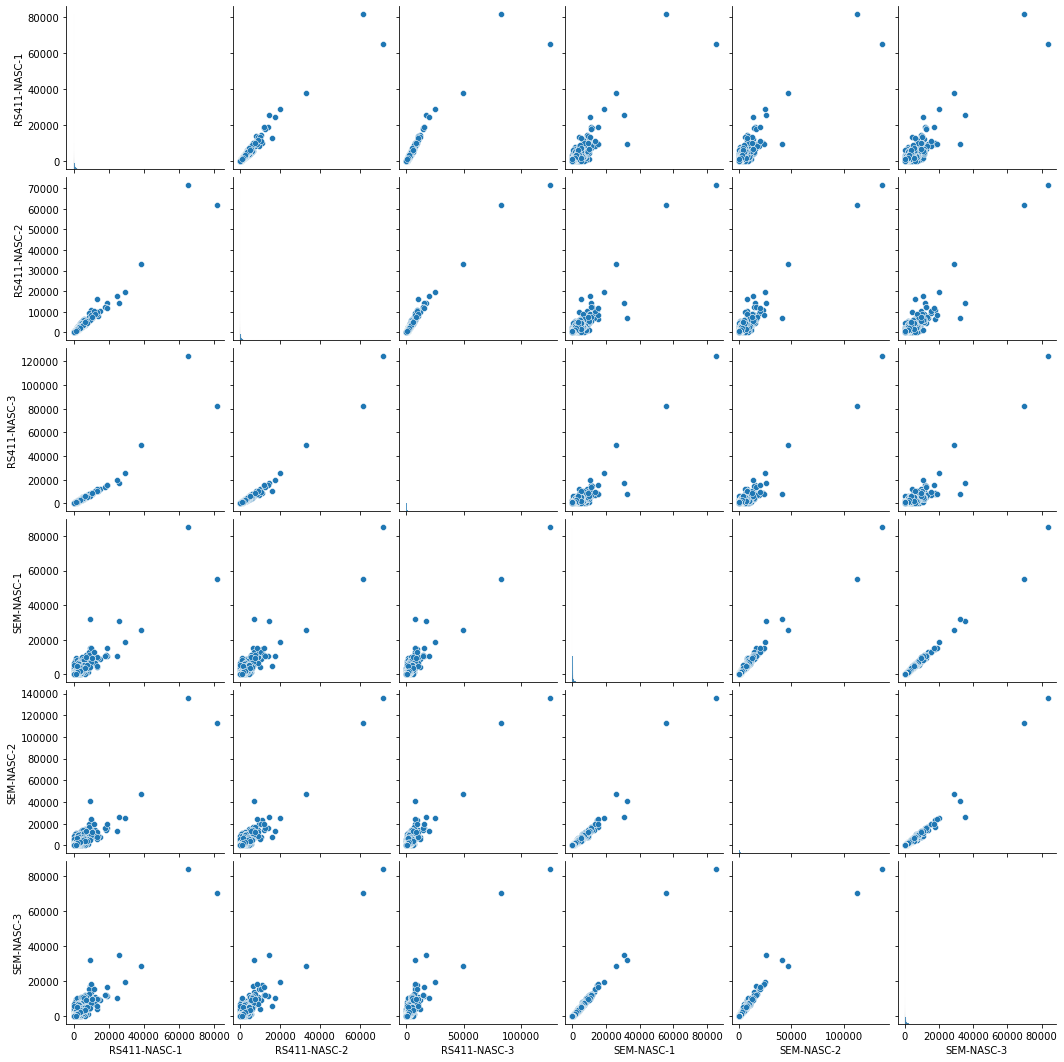

In [12]:
sns.pairplot(ReadCount_Pos)

In [13]:
ReadCount_tidy = ReadCount_Pos.melt(id_vars=["Geneid"], var_name="Sample", value_name="Readcount")

In [14]:
ReadCount_tidy

,Geneid,Sample,Readcount
0,DDX11L1,RS411-NASC-1,9
1,WASH7P,RS411-NASC-1,132
2,LOC729737,RS411-NASC-1,1
3,LOC100133331,RS411-NASC-1,86
4,LOC100288069,RS411-NASC-1,58
...,...,...,...
115723,VAMP7,SEM-NASC-3,0
115724,IL9R,SEM-NASC-3,1
115725,PRKY,SEM-NASC-3,1
115726,UTY,SEM-NASC-3,0


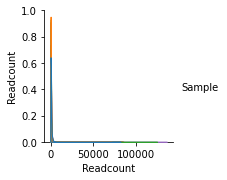

In [15]:
sns.pairplot(ReadCount_tidy,hue="Sample", vars=["Readcount"])

(0.0, 1000.0)

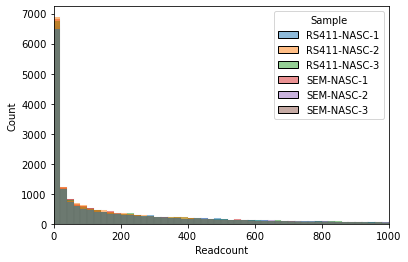

In [37]:
sns.histplot(data=ReadCount_tidy, x="Readcount", hue="Sample", binwidth=20)
plt.xlim(0,1000)

In [21]:
ReadCount_tidy.max(axis=0)

Geneid             ZZZ3
Sample       SEM-NASC-3
Readcount        136117
dtype: object

(0.0, 5000.0)

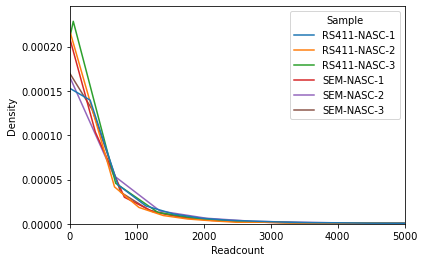

In [50]:
sns.kdeplot(data=ReadCount_tidy, x="Readcount", hue="Sample")
plt.xlim(0,5000)

(0.0, 10000.0)

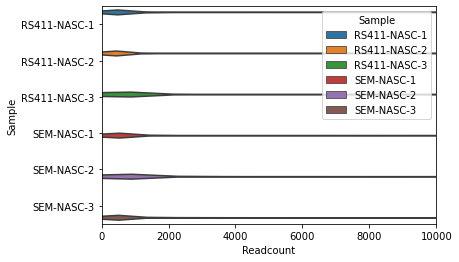

In [57]:
sns.violinplot(data=ReadCount_tidy, x="Readcount", y="Sample", inner=None, hue="Sample")
plt.xlim(0,10000)

In [78]:
sort_df=ReadCount_tidy.sort_values(by=['Readcount', 'Sample'], ascending=False).groupby('Sample')

In [79]:
print(sort_df)

In [80]:
sort_df.head()

,Geneid,Sample,Readcount
88631,MIR663A,SEM-NASC-2,136117
50055,MIR663A,RS411-NASC-3,124825
88996,MIR3648,SEM-NASC-2,112593
69343,MIR663A,SEM-NASC-1,85329
107919,MIR663A,SEM-NASC-3,84013
50420,MIR3648,RS411-NASC-3,82536
11844,MIR3648,RS411-NASC-1,81775
30767,MIR663A,RS411-NASC-2,71642
108284,MIR3648,SEM-NASC-3,69978
11479,MIR663A,RS411-NASC-1,65313


In [81]:
sort_df.head(10).sort_values(['Sample','Readcount'], ascending = False)

,Geneid,Sample,Readcount
107919,MIR663A,SEM-NASC-3,84013
108284,MIR3648,SEM-NASC-3,69978
99784,MALAT1,SEM-NASC-3,35019
101364,PAN3,SEM-NASC-3,31976
108285,MIR3687,SEM-NASC-3,28825
104854,ACTG1,SEM-NASC-3,19700
111763,HIST1H1D,SEM-NASC-3,18637
111742,HIST1H3B,SEM-NASC-3,17754
101979,ZFP36L1,SEM-NASC-3,17353
112705,ACTB,SEM-NASC-3,16895


In [103]:
df_total_counts = sort_df.sum('Readcount')

In [113]:
df_total_counts

,total_count
Sample,
RS411-NASC-1,8595805
RS411-NASC-2,6357297
RS411-NASC-3,7278189
SEM-NASC-1,7097382
SEM-NASC-2,9010763
SEM-NASC-3,7466404


In [112]:
df_total_counts = df_total_counts.rename(columns={"Readcount": "total_count"})

In [146]:
ReadCount_merged = ReadCount_tidy.merge(df_total_counts, on='Sample')

In [147]:
ReadCount_merged

,Geneid,Sample,Readcount,total_count
0,DDX11L1,RS411-NASC-1,9,8595805
1,WASH7P,RS411-NASC-1,132,8595805
2,LOC729737,RS411-NASC-1,1,8595805
3,LOC100133331,RS411-NASC-1,86,8595805
4,LOC100288069,RS411-NASC-1,58,8595805
...,...,...,...,...
115723,VAMP7,SEM-NASC-3,0,7466404
115724,IL9R,SEM-NASC-3,1,7466404
115725,PRKY,SEM-NASC-3,1,7466404
115726,UTY,SEM-NASC-3,0,7466404


In [148]:
ReadCount_merged["count_cpm"]=(ReadCount_merged["Readcount"]/ReadCount_merged["total_count"]*1000000)

In [149]:
ReadCount_merged

,Geneid,Sample,Readcount,total_count,count_cpm
0,DDX11L1,RS411-NASC-1,9,8595805,1.047022
1,WASH7P,RS411-NASC-1,132,8595805,15.356328
2,LOC729737,RS411-NASC-1,1,8595805,0.116336
3,LOC100133331,RS411-NASC-1,86,8595805,10.004880
4,LOC100288069,RS411-NASC-1,58,8595805,6.747477
...,...,...,...,...,...
115723,VAMP7,SEM-NASC-3,0,7466404,0.000000
115724,IL9R,SEM-NASC-3,1,7466404,0.133933
115725,PRKY,SEM-NASC-3,1,7466404,0.133933
115726,UTY,SEM-NASC-3,0,7466404,0.000000


In [150]:
ReadCount_merged['log_cpm'] = np.log(ReadCount_merged['count_cpm']+1)

In [151]:
ReadCount_merged

,Geneid,Sample,Readcount,total_count,count_cpm,log_cpm
0,DDX11L1,RS411-NASC-1,9,8595805,1.047022,0.716386
1,WASH7P,RS411-NASC-1,132,8595805,15.356328,2.794615
2,LOC729737,RS411-NASC-1,1,8595805,0.116336,0.110052
3,LOC100133331,RS411-NASC-1,86,8595805,10.004880,2.398339
4,LOC100288069,RS411-NASC-1,58,8595805,6.747477,2.047367
...,...,...,...,...,...,...
115723,VAMP7,SEM-NASC-3,0,7466404,0.000000,0.000000
115724,IL9R,SEM-NASC-3,1,7466404,0.133933,0.125692
115725,PRKY,SEM-NASC-3,1,7466404,0.133933,0.125692
115726,UTY,SEM-NASC-3,0,7466404,0.000000,0.000000


In [152]:
df_Var=ReadCount_merged.groupby('Geneid')['log_cpm'].var()

In [156]:
df_Var

Geneid
A1BG        0.043396
A1BG-AS1    0.097156
A1CF        0.262918
A2M         0.337930
A2M-AS1     0.014692
              ...   
ZXDC        0.002239
ZYG11B      0.010275
ZYX         0.037768
ZZEF1       0.002138
ZZZ3        0.003753
Name: log_cpm, Length: 19288, dtype: float64

In [158]:
ser_Var_high = df_Var.sort_values(ascending=False).head(n=100)

In [164]:
mask = ReadCount_merged['Geneid'].isin(ser_Var_high.index)

In [165]:
mask

0         False
1         False
2         False
3         False
4         False
          ...  
115723    False
115724    False
115725    False
115726    False
115727     True
Name: Geneid, Length: 115728, dtype: bool

In [169]:
ReadCount_Top100 = ReadCount_merged[mask]

In [170]:
ReadCount_Top100

,Geneid,Sample,Readcount,total_count,count_cpm,log_cpm
774,NEGR1,RS411-NASC-1,1078,8595805,125.410011,4.839531
1031,ZNF697,RS411-NASC-1,1,8595805,0.116336,0.110052
1444,SLC19A2,RS411-NASC-1,0,8595805,0.000000,0.000000
1470,TNFSF4,RS411-NASC-1,565,8595805,65.729737,4.200651
1507,RASAL2,RS411-NASC-1,0,8595805,0.000000,0.000000
...,...,...,...,...,...,...
115081,CLCN4,SEM-NASC-3,239,7466404,32.010055,3.496812
115121,SCML1,SEM-NASC-3,358,7466404,47.948115,3.890761
115284,GSPT2,SEM-NASC-3,396,7466404,53.037580,3.989680
115637,SLITRK4,SEM-NASC-3,242,7466404,32.411854,3.508911


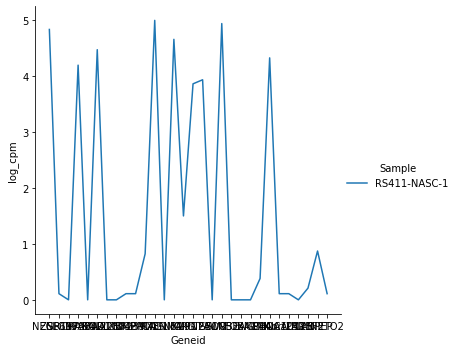

In [185]:
sns.relplot(data=ReadCount_Top100.head(30), y='log_cpm',x='Geneid', hue='Sample', kind='line')

In [171]:
ser_Var_high

Geneid
TRIB2       10.004990
MYO18B       9.626662
MED12L       9.591817
STC2         9.092288
KIAA0125     8.220895
              ...    
CLCN4        3.604952
UGT8         3.576310
TNFSF4       3.571065
CDH2         3.552986
SH3BP4       3.550741
Name: log_cpm, Length: 100, dtype: float64